<a href="https://colab.research.google.com/github/nayeemhasan100/Nayeem_Hasan_23512766/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 136.1 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found exist

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 6a4321cf714648cd91932e5f5cd382bd.d3aNe0j6YGG5nPJv8tNtRYVR


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
!pip install pyinputplus
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=474d62819a0787c6e2dcd0e1f895f135a234d5d4a922069118007f7349379656
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=66b0d5b6cd2787dcfc35665fcae39cc43c7c1e9ed4d5e9a197f69bedb252e22c
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask

## 🌤️ Weather Data Functions

In [41]:
import json
import fetch_my_weather

def get_weather_data(location, forecast_days=5):
    """
    Retrieve normalized weather data for a specified location (no extra helper funcs).

    Returns:
        dict: {
          "location": str,
          "current": {
              "temp_C": float|None,
              "weather_desc": str|None,
              "humidity_pct": int|None,
              "wind_kmph": float|None,
              "wind_dir": str|None,
              "precipitation_mm": float|None
          },
          "forecast": [
              {
                ...<original day fields>...,
                "precipitation_mm": float,          # daily total in mm (from daily or summed hourly)
                "chance_of_rain_pct": int|None
              }, ...
          ]
        }
    """
    try:
        result = fetch_my_weather.get_weather(location=location, format="raw_json")

        # Handle explicit tool error convention
        if isinstance(result, str) and result.startswith("Error:"):
            print(f"Error retrieving weather data: {result}")
            return None

        # Ensure result is a dict
        if isinstance(result, str):
            try:
                result = json.loads(result)
            except json.JSONDecodeError:
                print("Error: Weather backend returned an unexpected string payload.")
                return None

        # Safe converters (inline, no extra defs)
        def _to_float(x):
            try:
                return float(x)
            except (TypeError, ValueError):
                return None

        def _to_int(x):
            try:
                return int(x)
            except (TypeError, ValueError):
                return None

        # Extract "current"
        raw_current = (result.get("current_condition") or [None])[0] or {}
        # weatherDesc may be list of {"value": "..."}
        desc = raw_current.get("weather_desc")
        if not desc:
            wd = raw_current.get("weatherDesc")
            if isinstance(wd, list) and wd:
                desc = wd[0].get("value")

        # current precip: prefer mm, fallback inches -> mm
        cur_precip_mm = None
        for k in ("precipMM", "precip_mm"):
            v = raw_current.get(k)
            if v not in (None, ""):
                cur_precip_mm = _to_float(v)
                break
        if cur_precip_mm is None:
            for k in ("precipInches", "precip_in"):
                v = raw_current.get(k)
                if v not in (None, ""):
                    val = _to_float(v)
                    cur_precip_mm = val * 25.4 if val is not None else None
                    break

        current = {
            "temp_C": _to_float(raw_current.get("temp_C") or raw_current.get("tempC")),
            "weather_desc": desc,
            "humidity_pct": _to_int(raw_current.get("humidity")),
            "wind_kmph": _to_float(raw_current.get("windspeedKmph") or raw_current.get("wind_speed_kmph")),
            "wind_dir": raw_current.get("winddir16Point") or raw_current.get("wind_dir"),
            "precipitation_mm": cur_precip_mm,
        }

        # Extract forecast days
        raw_days = (result.get("weather") or [])[:max(0, int(forecast_days))]
        forecast = []
        for day in raw_days:
            # 1) Try daily aggregate precip in mm
            daily_mm = None
            for k in ("totalprecipMM", "totalprecipMm", "totalprecip_mm", "total_precip_mm"):
                v = day.get(k)
                if v not in (None, ""):
                    daily_mm = _to_float(v)
                    break
            # 2) If only inches provided, convert to mm
            if daily_mm is None:
                for k in ("totalprecipInches", "totalprecip_inches", "total_precip_in"):
                    v = day.get(k)
                    if v not in (None, ""):
                        val = _to_float(v)
                        daily_mm = val * 25.4 if val is not None else None
                        break
            # 3) Fallback: sum hourly precip
            if daily_mm is None:
                total = 0.0
                found_any = False
                hourly = day.get("hourly") or []
                for h in hourly:
                    hv = None
                    for hk in ("precipMM", "precipMm", "precip_mm"):
                        vv = h.get(hk)
                        if vv not in (None, ""):
                            hv = _to_float(vv)
                            break
                    if hv is None:
                        for hk in ("precipInches", "precip_in", "precipIN"):
                            vv = h.get(hk)
                            if vv not in (None, ""):
                                val = _to_float(vv)
                                hv = val * 25.4 if val is not None else None
                                break
                    if hv is not None:
                        found_any = True
                        total += hv
                daily_mm = total if found_any else 0.0  # keep predictable number

            # chance of rain: take max over hourly keys if present
            chance_val = None
            hourly = day.get("hourly") or []
            for h in hourly:
                for ck in ("chanceofrain", "chance_of_rain", "chanceOfRain"):
                    cv = h.get(ck)
                    if cv not in (None, ""):
                        ci = _to_int(cv)
                        if ci is not None:
                            chance_val = ci if chance_val is None else max(chance_val, ci)
                        break

            # Preserve original day fields and add normalized ones
            day_out = dict(day)  # shallow copy of original fields
            day_out["precipitation_mm"] = float(daily_mm) if daily_mm is not None else 0.0
            day_out["chance_of_rain_pct"] = chance_val

            # Normalize sunrise/sunset if under astronomy[]
            if "astronomy" in day and isinstance(day["astronomy"], list) and day["astronomy"]:
                astro = day["astronomy"][0]
                day_out.setdefault("sunrise", astro.get("sunrise"))
                day_out.setdefault("sunset", astro.get("sunset"))

            forecast.append(day_out)

        return {
            "location": location,
            "current": current,
            "forecast": forecast
        }

    except Exception as e:
        print(f"Error retrieving weather data: {e}")
        return {}


## 📊 Visualisation Functions

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def create_temperature_visualisation(weather_data, output_type='display'):

    forecast = weather_data.get("forecast", [])
    if not forecast:
        print("No forecast data available to visualise.")
        return None

    # Extract values
    dates = [day.get("date") for day in forecast]
    min_temps = [int(day.get("mintempC", 0)) for day in forecast]
    max_temps = [int(day.get("maxtempC", 0)) for day in forecast]
    avg_temps = [int(day.get("avgtempC", 0)) for day in forecast]

    # Setup positions for grouped bars
    x = np.arange(len(dates))
    bar_width = 0.25

    fig, ax = plt.subplots(figsize=(9, 6))
    ax.bar(x - bar_width, min_temps, width=bar_width, label="Min Temp (°C)")
    ax.bar(x, avg_temps, width=bar_width, label="Avg Temp (°C)")
    ax.bar(x + bar_width, max_temps, width=bar_width, label="Max Temp (°C)")

    # Labels and formatting
    ax.set_title(f"Temperature Forecast for {weather_data.get('location', 'Unknown')}", fontsize=14, weight="bold")
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Temperature (°C)", fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(dates, rotation=30, ha="right")
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    fig.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


In [33]:


def create_precipitation_visualisation(weather_data, output_type='display'):

    forecast = weather_data.get("forecast", [])
    if not forecast:
        print("No forecast data available to visualise.")
        return None

    # Extract values
    dates = [day.get("date") for day in forecast]
    rainfall = [float(day.get("totalprecipMM", 0)) for day in forecast]   # total precipitation in mm
    chance_of_rain = [
        float(day.get("hourly", [{}])[0].get("chanceofrain", 0)) if "hourly" in day else 0
        for day in forecast
    ]

    x = np.arange(len(dates))

    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Bar chart for rainfall
    bars = ax1.bar(x, rainfall, color="skyblue", label="Rainfall (mm)")
    ax1.set_xlabel("Date", fontsize=12)
    ax1.set_ylabel("Rainfall (mm)", color="blue", fontsize=12)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_xticks(x)
    ax1.set_xticklabels(dates, rotation=30, ha="right")

    # Secondary axis for chance of rain
    ax2 = ax1.twinx()
    ax2.plot(x, chance_of_rain, color="darkred", marker="o", linewidth=2, label="Chance of Rain (%)")
    ax2.set_ylabel("Chance of Rain (%)", color="darkred", fontsize=12)
    ax2.tick_params(axis="y", labelcolor="darkred")

    # Title and legend
    fig.suptitle(f"Precipitation Forecast for {weather_data.get('location', 'Unknown')}", fontsize=14, weight="bold")

    # Combine legends from both axes
    bars_legend, labels1 = ax1.get_legend_handles_labels()
    line_legend, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(bars_legend + line_legend, labels1 + labels2, loc="upper left")

    fig.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


## 🤖 Natural Language Processing

In [50]:
import re
from datetime import datetime, timedelta

def parse_weather_question(question):
    original = question  # keep original if you need it
    q = question.lower()
    result = {
        "location": None,
        "time_period": "today",
        "attribute": "general"
    }

    # ---- LOCATION: capture after "in/of/at/for" until a time keyword or end
    # e.g., "what is the temperature of bangladesh today"
    #       "weather in south australia tomorrow?"
    loc_match = re.search(
        r'\b(?:in|of|at|for)\s+([a-z][a-z\s\-\’\'\.]+?)(?=\s+(?:today|tomorrow|next\b)|\s*\?*$|$)',
        q
    )
    if loc_match:
        # Title-case multi-word names cleanly (e.g., "south australia" -> "South Australia")
        loc = loc_match.group(1).strip(" ?.!;:,")
        result["location"] = " ".join(w.capitalize() for w in loc.split())
    if "tomorrow" in q:
        result["time_period"] = "tomorrow"
    else:
        next_days = re.search(r'\bnext\s+(\d+)\s+days\b', q)
        if next_days:
            days = int(next_days.group(1))
            result["time_period"] = f"next_{days}_days"

    if "temperature" in q or "temp" in q:
        result["attribute"] = "temperature"
    elif "rain" in q or "precipitation" in q:
        result["attribute"] = "precipitation"
    elif "forecast" in q:
        result["attribute"] = "forecast"

    return result


## 🧭 User Interface

Ask a weather question (e.g. 'What is the temperature in Bangladesh tomorrow??'): What is the temperature in Perth tomorrow?

Parsed question: {'location': 'Perth', 'time_period': 'tomorrow', 'attribute': 'temperature'}

Tomorrow in Perth, expect temperatures from 15°C to 26°C with an average of 20°C.


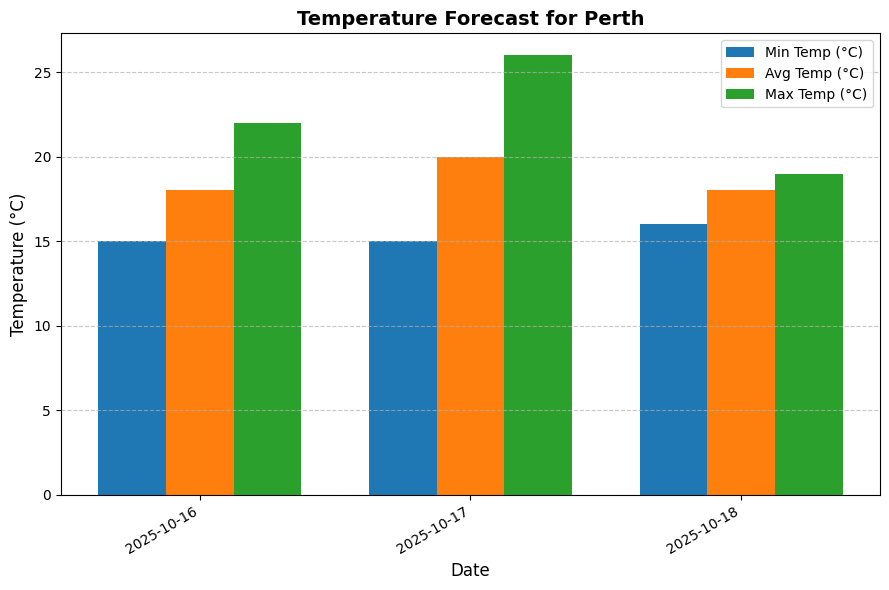

None


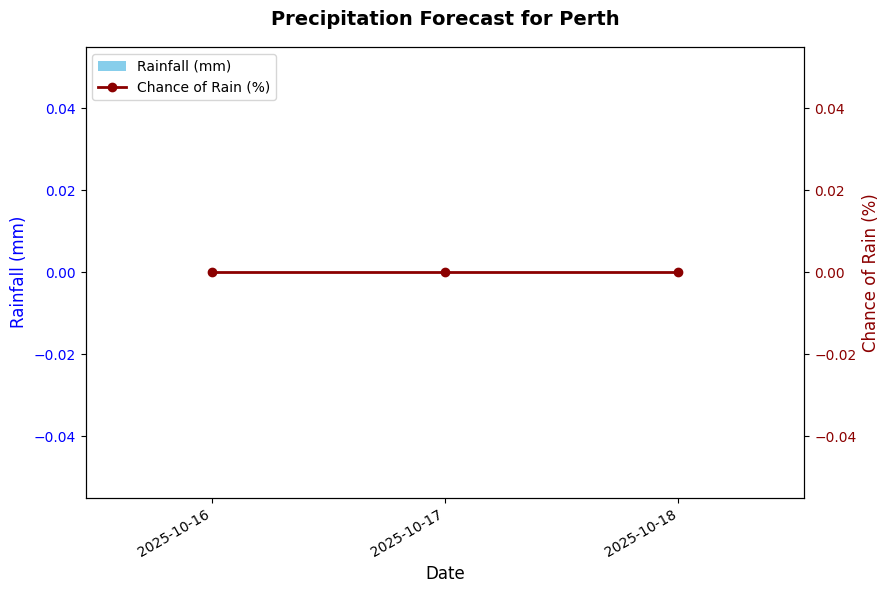

None


In [54]:




















def main():
    # Step 1: Ask user for input
    user_question = input("Ask a weather question (e.g. 'What is the temperature in Bangladesh tomorrow??'): ")

    # Step 2: Parse the question
    parsed = parse_weather_question(user_question)
    print("\nParsed question:", parsed)

    location = parsed.get("location")

    weather_data = get_weather_data(location)

    response = generate_weather_response(parsed, weather_data)
    print("\n" + response)
    print(create_temperature_visualisation(weather_data))
    print(create_precipitation_visualisation(weather_data))


# Run only if this file is executed directly
if __name__ == "__main__":
    main()


## 🧩 Main Application Logic

In [45]:
def generate_weather_response(parsed_question, weather_data):

    if not weather_data or "forecast" not in weather_data:
        return "Sorry, I couldn't retrieve weather data at this time."

    location = parsed_question.get("location", weather_data.get("location", "your location"))
    time_period = parsed_question.get("time_period", "today")
    attribute = parsed_question.get("attribute", "general")

    # Helper to get the forecast for a specific day index
    def get_day_forecast(index):
        if index < len(weather_data["forecast"]):
            return weather_data["forecast"][index]
        return None

    response = ""

    if time_period == "today":
        day_forecast = get_day_forecast(0)
        if not day_forecast:
            return f"Sorry, I don't have today's forecast for {location}."

        if attribute == "temperature":
            response = (f"Today in {location}, the temperature ranges from "
                        f"{day_forecast['mintempC']}°C to {day_forecast['maxtempC']}°C "
                        f"with an average of {day_forecast['avgtempC']}°C.")
        elif attribute == "precipitation":
            rain = day_forecast.get("totalprecipMM", "0")
            chance = day_forecast.get("hourly", [{}])[0].get("chanceofrain", "0")
            response = (f"Today in {location}, total precipitation is {rain} mm "
                        f"with a {chance}% chance of rain.")
        else:
            response = (f"Today's weather in {location}: Temperature {day_forecast['mintempC']}°C - "
                        f"{day_forecast['maxtempC']}°C, Precipitation {day_forecast.get('totalprecipMM','0')} mm.")

    elif time_period == "tomorrow":
        day_forecast = get_day_forecast(1)
        if not day_forecast:
            return f"Sorry, I don't have tomorrow's forecast for {location}."

        if attribute == "temperature":
            response = (f"Tomorrow in {location}, expect temperatures from "
                        f"{day_forecast['mintempC']}°C to {day_forecast['maxtempC']}°C "
                        f"with an average of {day_forecast['avgtempC']}°C.")
        elif attribute == "precipitation":
            rain = day_forecast.get("totalprecipMM", "0")
            chance = day_forecast.get("hourly", [{}])[0].get("chanceofrain", "0")
            response = (f"Tomorrow in {location}, total precipitation will be {rain} mm "
                        f"with a {chance}% chance of rain.")
        else:
            response = (f"Tomorrow's weather in {location}: Temperature {day_forecast['mintempC']}°C - "
                        f"{day_forecast['maxtempC']}°C, Precipitation {day_forecast.get('totalprecipMM','0')} mm.")

    elif time_period.startswith("next_"):
        days = int(time_period.split("_")[1])
        forecast_list = weather_data.get("forecast", [])[:days]
        if not forecast_list:
            return f"Sorry, I don't have the forecast for the next {days} days in {location}."

        response_lines = [f"Weather forecast for the next {days} days in {location}:"]
        for day in forecast_list:
            line = (f"{day['date']}: Temp {day['mintempC']}°C-{day['maxtempC']}°C, "
                    f"Precip {day.get('totalprecipMM','0')} mm")
            response_lines.append(line)
        response = "\n".join(response_lines)

    else:
        response = "Sorry, I couldn't understand the time period you asked for."

    return response


## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.